In [1]:
# 匯入外部模組
import numpy as np
from sklearn import svm

import matplotlib.pyplot as plt
from sklearn import svm, datasets
%matplotlib inline

In [2]:
# 讀取鳶尾花資料 (山鳶尾花, 變色鳶尾花, 維吉尼亞鳶尾花)
# 花萼長:0, 花萼寬:1, 花瓣長:2, 花瓣寬:3, 花種編號:4
def get_data():
    data = np.loadtxt("iris.txt")
    iris_data = data[50:]
    return iris_data

def get_train_and_test(feature):
    iris_data = get_data()

    positive_data = iris_data[:50, feature]

    negative_data = iris_data[50:, feature]

    train_data_positive = positive_data[:25]
    train_data_negative = negative_data[:25]

    test_data_positive = positive_data[25:]
    test_data_negative = negative_data[25:]

    train_data = np.concatenate((train_data_positive, train_data_negative), axis=0)
    test_data = np.concatenate((test_data_positive, test_data_negative), axis=0)

    train_label = [1] * len(train_data_positive) + [-1] * len(train_data_negative)
    test_label = [1] * len(test_data_positive) + [-1] * len(test_data_negative)

    train_label_plot = ['positive'] * len(train_data_positive) + ['negative'] * len(train_data_negative)
    test_label_plot = ['positive'] * len(test_data_positive) + ['negative'] * len(test_data_negative)

    return(train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative, train_label_plot, test_label_plot)

def get_test_and_train(feature):
    iris_data = get_data()

    positive_data = iris_data[:50, feature]

    negative_data = iris_data[50:, feature]

    train_data_positive = positive_data[25:]
    train_data_negative = negative_data[25:]

    test_data_positive = positive_data[:25]
    test_data_negative = negative_data[:25]

    train_data = np.concatenate((train_data_positive, train_data_negative), axis=0)
    test_data = np.concatenate((test_data_positive, test_data_negative), axis=0)

    train_label = [1] * len(train_data_positive) + [-1] * len(train_data_negative)
    test_label = [1] * len(test_data_positive) + [-1] * len(test_data_negative)

    train_label_plot = ['positive'] * len(train_data_positive) + ['negative'] * len(train_data_negative)
    test_label_plot = ['positive'] * len(test_data_positive) + ['negative'] * len(test_data_negative)

    return(train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative, train_label_plot, test_label_plot)

In [8]:
feature = [2, 3]

train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative, train_label_plot, test_label_plot = get_train_and_test(feature)

svm_linear = svm.SVC(kernel='linear', C=10)
svm_linear.fit(train_data, train_label)

print('正確:', test_label)
print('-'*100)

predict = svm_linear.predict(test_data)
print('預測:', predict)

results = test_label == predict
print('比對:', results)
print("C=10")
print('正確率:', round(np.sum(results)/len(results), 4))

正確: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
----------------------------------------------------------------------------------------------------
預測: [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
比對: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
C=10
正確率: 0.96


In [10]:
feature = [2, 3]

train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative, train_label_plot, test_label_plot = get_test_and_train(feature)

svm_linear = svm.SVC(kernel='linear', C=10)
svm_linear.fit(train_data, train_label)

print('正確:', test_label)
print('-'*100)

predict = svm_linear.predict(test_data)
print('預測:', predict)

results = test_label == predict
print('比對:', results)
print("C=10")
print('正確率:', round(np.sum(results)/len(results), 4))

正確: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
----------------------------------------------------------------------------------------------------
預測: [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1]
比對: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True]
C=10
正確率: 0.94


In [11]:
feature = [2, 3]

train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative, train_label_plot, test_label_plot = get_train_and_test(feature)

svm_linear = svm.SVC(kernel='linear', C=100)
svm_linear.fit(train_data, train_label)

print('正確:', test_label)
print('-'*100)

predict = svm_linear.predict(test_data)
print('預測:', predict)

results = test_label == predict
print('比對:', results)
print("C=100")
print('正確率:', round(np.sum(results)/len(results), 4))

正確: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
----------------------------------------------------------------------------------------------------
預測: [ 1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
比對: [ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True False False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
C=100
正確率: 0.92


In [12]:
feature = [2, 3]

train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative, train_label_plot, test_label_plot = get_test_and_train(feature)

svm_linear = svm.SVC(kernel='linear', C=100)
svm_linear.fit(train_data, train_label)


print('正確:', test_label)
print('-'*100)

predict = svm_linear.predict(test_data)
print('預測:', predict)

results = test_label == predict
print('比對:', results)
print("C=100")
print('正確率:', round(np.sum(results)/len(results), 4))

正確: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
----------------------------------------------------------------------------------------------------
預測: [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1]
比對: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True]
C=100
正確率: 0.94


In [14]:
feature = [2, 3]

train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative, train_label_plot, test_label_plot = get_train_and_test(feature)

svm_rbf = svm.SVC(kernel='rbf', C=10, gamma=5)
svm_rbf.fit(train_data, train_label)

# print('正確:', test_label)
# print('-'*100)

predict = svm_rbf.predict(test_data)
# print('預測:', predict)

results = test_label == predict
# print('比對:', results)
print("C=10")
print("sigma=5")
print('正確率:', round(np.sum(results)/len(results), 4))

C=10
sigma=5
正確率: 0.94


In [15]:
feature = [2, 3]

train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative, train_label_plot, test_label_plot = get_test_and_train(feature)

svm_rbf = svm.SVC(kernel='rbf', C=10, gamma=5)
svm_rbf.fit(train_data, train_label)


# print('正確:', test_label)
# print('-'*100)

predict = svm_rbf.predict(test_data)
# print('預測:', predict)

results = test_label == predict
# print('比對:', results)
print("C=10")
print("sigma=5")
print('正確率:', round(np.sum(results)/len(results), 4))

C=10
sigma=5
正確率: 0.94


In [30]:
feature = [2, 3]

train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative, train_label_plot, test_label_plot = get_train_and_test(feature)

svm_rbf = svm.SVC(kernel='rbf', C=10, gamma=0.2)
svm_rbf.fit(train_data, train_label)
predict = svm_rbf.predict(test_data)
results = test_label == predict
print("sigma=5")
print('正確率:', round(np.sum(results)/len(results), 4))

svm_rbf = svm.SVC(kernel='rbf', C=10, gamma=0.5)
svm_rbf.fit(train_data, train_label)
predict = svm_rbf.predict(test_data)
results = test_label == predict
print("sigma=0.1")
print('正確率:', round(np.sum(results)/len(results), 4))

svm_rbf = svm.SVC(kernel='rbf', C=10, gamma=2)
svm_rbf.fit(train_data, train_label)
predict = svm_rbf.predict(test_data)
results = test_label == predict
print("sigma=0.5")
print('正確率:', round(np.sum(results)/len(results), 4))

svm_rbf = svm.SVC(kernel='rbf', C=10, gamma=50)
svm_rbf.fit(train_data, train_label)
predict = svm_rbf.predict(test_data)
results = test_label == predict
print("sigma=0.1")
print('正確率:', round(np.sum(results)/len(results), 4))

svm_rbf = svm.SVC(kernel='rbf', C=10, gamma=200)
svm_rbf.fit(train_data, train_label)
predict = svm_rbf.predict(test_data)
results = test_label == predict
print("sigma=0.05")
print('正確率:', round(np.sum(results)/len(results), 4))

sigma=5
正確率: 0.94
sigma=0.1
正確率: 0.96
sigma=0.5
正確率: 0.94
sigma=0.1
正確率: 0.88
sigma=0.05
正確率: 0.82


In [31]:
feature = [2, 3]

train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative, train_label_plot, test_label_plot = get_test_and_train(feature)

svm_rbf = svm.SVC(kernel='rbf', C=10, gamma=0.2)
svm_rbf.fit(train_data, train_label)
predict = svm_rbf.predict(test_data)
results = test_label == predict
print("sigma=5")
print('正確率:', round(np.sum(results)/len(results), 4))

svm_rbf = svm.SVC(kernel='rbf', C=10, gamma=0.5)
svm_rbf.fit(train_data, train_label)
predict = svm_rbf.predict(test_data)
results = test_label == predict
print("sigma=0.1")
print('正確率:', round(np.sum(results)/len(results), 4))

svm_rbf = svm.SVC(kernel='rbf', C=10, gamma=2)
svm_rbf.fit(train_data, train_label)
predict = svm_rbf.predict(test_data)
results = test_label == predict
print("sigma=0.5")
print('正確率:', round(np.sum(results)/len(results), 4))

svm_rbf = svm.SVC(kernel='rbf', C=10, gamma=50)
svm_rbf.fit(train_data, train_label)
predict = svm_rbf.predict(test_data)
results = test_label == predict
print("sigma=0.1")
print('正確率:', round(np.sum(results)/len(results), 4))

svm_rbf = svm.SVC(kernel='rbf', C=10, gamma=200)
svm_rbf.fit(train_data, train_label)
predict = svm_rbf.predict(test_data)
results = test_label == predict
print("sigma=0.05")
print('正確率:', round(np.sum(results)/len(results), 4))

sigma=5
正確率: 0.94
sigma=0.1
正確率: 0.94
sigma=0.5
正確率: 0.94
sigma=0.1
正確率: 0.86
sigma=0.05
正確率: 0.8


In [15]:
def plotSVC(title):
  # create a mesh to plot in
    x_min, x_max = (X[:, 0].min()- 1, X[:, 0].max() + 1)
    y_min, y_max = (X[:, 1].min()-1, X[:, 1].max() + 1)
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    plt.show()

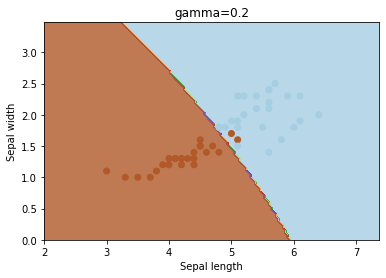

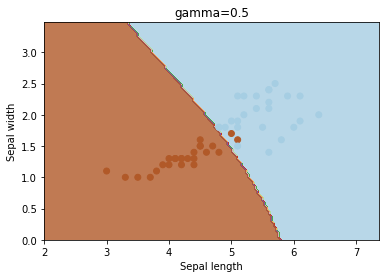

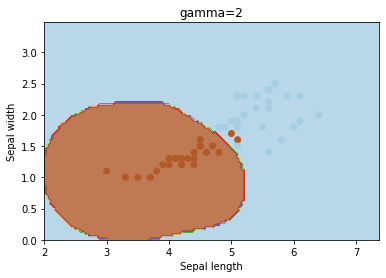

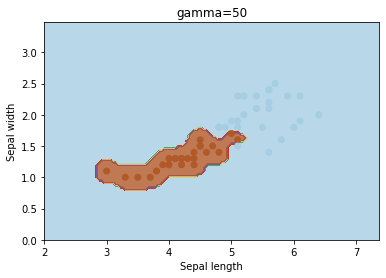

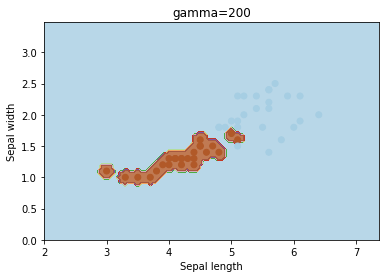

In [51]:
feature = [2, 3]

train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative, train_label_plot, test_label_plot = get_test_and_train(feature)

X = train_data
y = train_label

gammas = [0.2, 0.5, 2, 50, 200]
for gamma in gammas:
   svc = svm.SVC(kernel='rbf', gamma=gamma).fit(X, y)
   plotSVC('gamma=' + str(gamma))

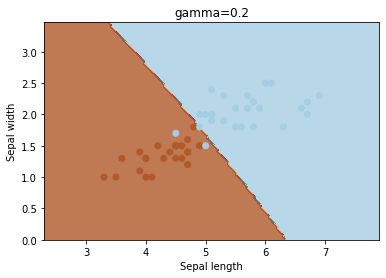

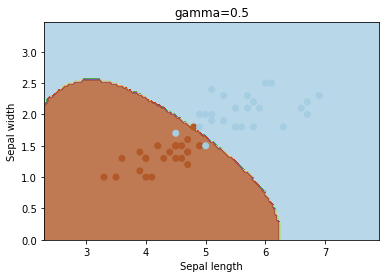

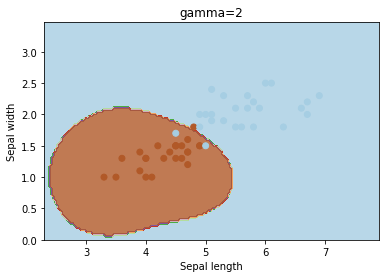

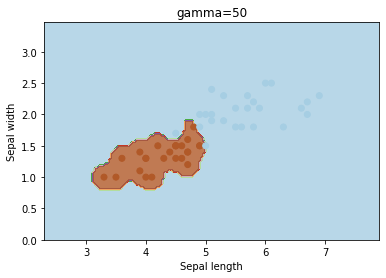

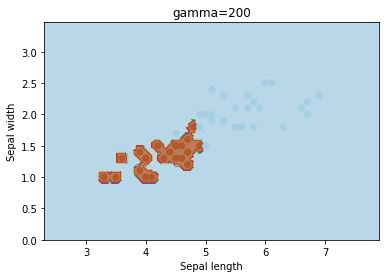

In [52]:
feature = [2, 3]

train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative, train_label_plot, test_label_plot = get_train_and_test(feature)

X = train_data

y = train_label

gammas = [0.2, 0.5, 2, 50, 200]
for gamma in gammas:
   svc = svm.SVC(kernel='rbf', gamma=gamma).fit(X, y)
   plotSVC('gamma=' + str(gamma))

In [9]:
feature = [2, 3]

train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative, train_label_plot, test_label_plot = get_train_and_test(feature)

svm_poly = svm.SVC(kernel='poly', C=10, degree=2)
svm_poly.fit(train_data, train_label)

print('正確:', test_label)
print('-'*100)

predict = svm_poly.predict(test_data)
print('預測:', predict)

results = test_label == predict
print('比對:', results)
print("C=10")
print('正確率:', round(np.sum(results)/len(results), 4))

正確: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
----------------------------------------------------------------------------------------------------
預測: [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
比對: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True False False  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True]
C=10
正確率: 0.92


In [8]:
feature = [2, 3]

train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative, train_label_plot, test_label_plot = get_test_and_train(feature)

svm_poly = svm.SVC(kernel='poly', C=10, degree=2)
svm_poly.fit(train_data, train_label)


print('正確:', test_label)
print('-'*100)

predict = svm_poly.predict(test_data)
print('預測:', predict)

results = test_label == predict
print('比對:', results)
print("C=100")
print('正確率:', round(np.sum(results)/len(results), 4))

正確: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
----------------------------------------------------------------------------------------------------
預測: [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1]
比對: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True]
C=100
正確率: 0.94


In [10]:
feature = [2, 3]

train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative, train_label_plot, test_label_plot = get_train_and_test(feature)

svm_poly = svm.SVC(kernel='poly', C=10, degree=4)
svm_poly.fit(train_data, train_label)

print('正確:', test_label)
print('-'*100)

predict = svm_poly.predict(test_data)
print('預測:', predict)

results = test_label == predict
print('比對:', results)
print("C=10")
print('正確率:', round(np.sum(results)/len(results), 4))

正確: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
----------------------------------------------------------------------------------------------------
預測: [ 1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
比對: [ True  True False  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
C=10
正確率: 0.94


In [11]:
feature = [2, 3]

train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative, train_label_plot, test_label_plot = get_test_and_train(feature)

svm_poly = svm.SVC(kernel='poly', C=10, degree=4)
svm_poly.fit(train_data, train_label)


print('正確:', test_label)
print('-'*100)

predict = svm_poly.predict(test_data)
print('預測:', predict)

results = test_label == predict
print('比對:', results)
print("C=100")
print('正確率:', round(np.sum(results)/len(results), 4))

正確: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
----------------------------------------------------------------------------------------------------
預測: [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1]
比對: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True]
C=100
正確率: 0.94


In [12]:
feature = [2, 3]

train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative, train_label_plot, test_label_plot = get_train_and_test(feature)

svm_poly = svm.SVC(kernel='poly', C=10, degree=6)
svm_poly.fit(train_data, train_label)

print('正確:', test_label)
print('-'*100)

predict = svm_poly.predict(test_data)
print('預測:', predict)

results = test_label == predict
print('比對:', results)
print("C=10")
print('正確率:', round(np.sum(results)/len(results), 4))

正確: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
----------------------------------------------------------------------------------------------------
預測: [ 1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
比對: [ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
C=10
正確率: 0.96


In [13]:
feature = [2, 3]

train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative, train_label_plot, test_label_plot = get_test_and_train(feature)

svm_poly = svm.SVC(kernel='poly', C=10, degree=6)
svm_poly.fit(train_data, train_label)


print('正確:', test_label)
print('-'*100)

predict = svm_poly.predict(test_data)
print('預測:', predict)

results = test_label == predict
print('比對:', results)
print("C=100")
print('正確率:', round(np.sum(results)/len(results), 4))

正確: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
----------------------------------------------------------------------------------------------------
預測: [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1
  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1]
比對: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True False
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True]
C=100
正確率: 0.92


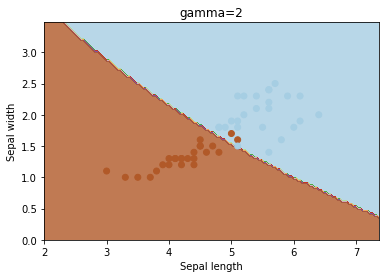

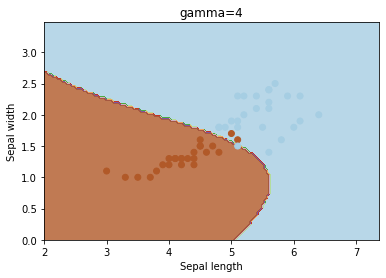

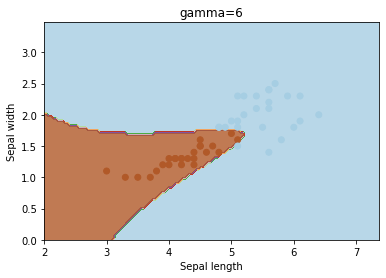

In [18]:
feature = [2, 3]

train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative, train_label_plot, test_label_plot = get_test_and_train(feature)

X = train_data
y = train_label

degrees = [2, 4, 6]
for degree in degrees:
   svc = svm.SVC(kernel='poly', C=10, degree=degree).fit(X, y)
   plotSVC('gamma=' + str(degree))

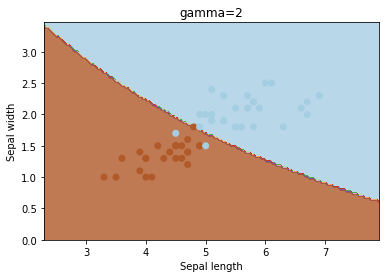

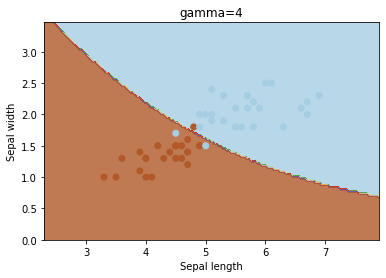

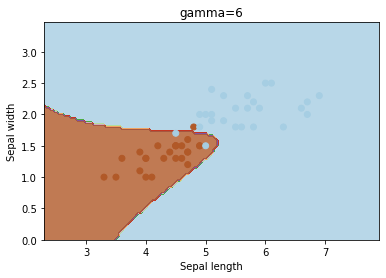

In [19]:
feature = [2, 3]

train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative, train_label_plot, test_label_plot = get_train_and_test(feature)

X = train_data
y = train_label

degrees = [2, 4, 6]
for degree in degrees:
   svc = svm.SVC(kernel='poly', C=10, degree=degree).fit(X, y)
   plotSVC('gamma=' + str(degree))